In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
files = [file for file in os.listdir('/content/drive/MyDrive/Sales_Data')]
for file in files:
    print(file)

Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_August_2019.csv
Sales_October_2019.csv
Sales_June_2019.csv
Sales_September_2019.csv
Sales_January_2019.csv
Sales_May_2019.csv
Sales_July_2019.csv
Sales_November_2019.csv
Sales_March_2019.csv


In [ ]:
df = pd.DataFrame()

for file in files:
  data = pd.read_csv('/content/drive/MyDrive/Sales_Data/{}'.format(file))
  df = pd.concat([df, data])

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [ ]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
df = df.dropna(how = 'all')

In [ ]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
df['Quantity Ordered'].unique()

array(['1', '2', '4', '3', 'Quantity Ordered', '7', '5', '6', '8', '9'],
      dtype=object)

**There is a non integer in there due to the concatenation. Let's filter it out**

In [ ]:
#Filter out text data that not related

remove = df['Quantity Ordered'] == 'Quantity Ordered'
df = df[~remove]

df['Quantity Ordered'].unique()

array(['1', '2', '4', '3', '7', '5', '6', '8', '9'], dtype=object)

**Let's get the city and state to do comparisons later**

In [ ]:
def state(x):
  return x[-8:-6]

def city(x):
  return x.split(', ')[1]


In [ ]:
df['State'] = df['Purchase Address'].apply(state)
df['City'] = df['Purchase Address'].apply(city)

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,State,City
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NY,New York City
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NY,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NY,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",CA,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",GA,Atlanta


**Let's change the Price Each, and Quantity Ordered to a float or an int respectively to do some computations. Let's also make PD recognize the Order date as a date**

In [ ]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
State               0
City                0
dtype: int64

In [ ]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
State                       object
City                        object
dtype: object

**Let's get the cost for each sale**

In [ ]:
df['Price Transaction'] = df['Quantity Ordered'] * df['Price Each']

In [ ]:
df.sort_values('Quantity Ordered', ascending = False).head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,State,City,Price Transaction
3740,226483,AAA Batteries (4-pack),9,2.99,2019-07-20 23:28:00,"867 Sunset St, San Francisco, CA 94016",CA,San Francisco,26.91
1236,211097,AAA Batteries (4-pack),9,2.99,2019-06-23 08:29:00,"338 Hickory St, Los Angeles, CA 90001",CA,Los Angeles,26.91
4376,227096,AAA Batteries (4-pack),9,2.99,2019-07-29 09:50:00,"60 10th St, San Francisco, CA 94016",CA,San Francisco,26.91
20141,278566,AAA Batteries (4-pack),8,2.99,2019-10-13 19:07:00,"992 Park St, Los Angeles, CA 90001",CA,Los Angeles,23.92
12809,291034,AAA Batteries (4-pack),8,2.99,2019-11-09 16:30:00,"268 Willow St, Dallas, TX 75001",TX,Dallas,23.92


**Let's also add a month column for filtering**

In [ ]:
import calendar

def MonthName(x):
  return calendar.month_name[x]

In [ ]:
df['Month'] = (df['Order Date'].dt.month).apply(MonthName)
df['Month Number'] = df['Order Date'].dt.month

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,State,City,Price Transaction,Month,Month Number
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",NY,New York City,1700.00,December,12
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",NY,New York City,600.00,December,12
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",NY,New York City,11.95,December,12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",CA,San Francisco,149.99,December,12
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",GA,Atlanta,11.95,December,12


**Onto the Data Analysis**

In [ ]:
monthly_sales = df.groupby(['Month Number', 'Month'])['Price Transaction'].sum().reset_index()

monthly_sales

,Month Number,Month,Price Transaction
0,1,January,1822256.73
1,2,February,2202022.42
2,3,March,2807100.38
3,4,April,3390670.24
4,5,May,3152606.75
5,6,June,2577802.26
6,7,July,2647775.76
7,8,August,2244467.88
8,9,September,2097560.13
9,10,October,3736726.88


Text(0, 0.5, 'Months')

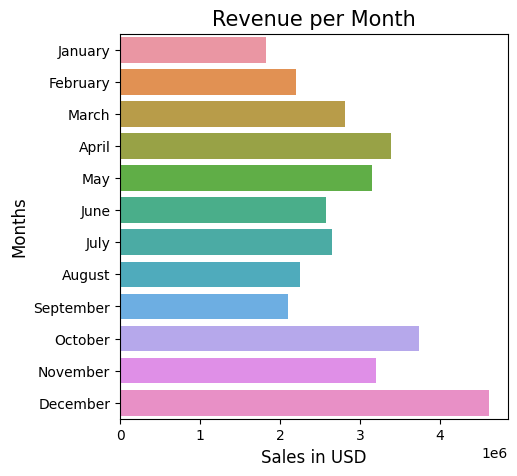

In [ ]:
plt.figure(figsize = (5,5))

sns.barplot(
    data = monthly_sales,
    x = monthly_sales['Price Transaction'],
    y = monthly_sales['Month']
)
plt.title('Revenue per Month', fontsize = 15)
plt.xlabel("Sales in USD", fontsize = 12)
plt.ylabel("Months", fontsize = 12)

**Let's do it per city**

In [ ]:
city_sales = df.groupby(['City'])['Price Transaction'].sum().sort_values(ascending = False).reset_index()

city_sales

,City,Price Transaction
0,San Francisco,8262203.91
1,Los Angeles,5452570.80
2,New York City,4664317.43
3,Boston,3661642.01
4,Atlanta,2795498.58
5,Dallas,2767975.40
6,Seattle,2747755.48
7,Portland,2320490.61
8,Austin,1819581.75


Text(0, 0.5, 'State')

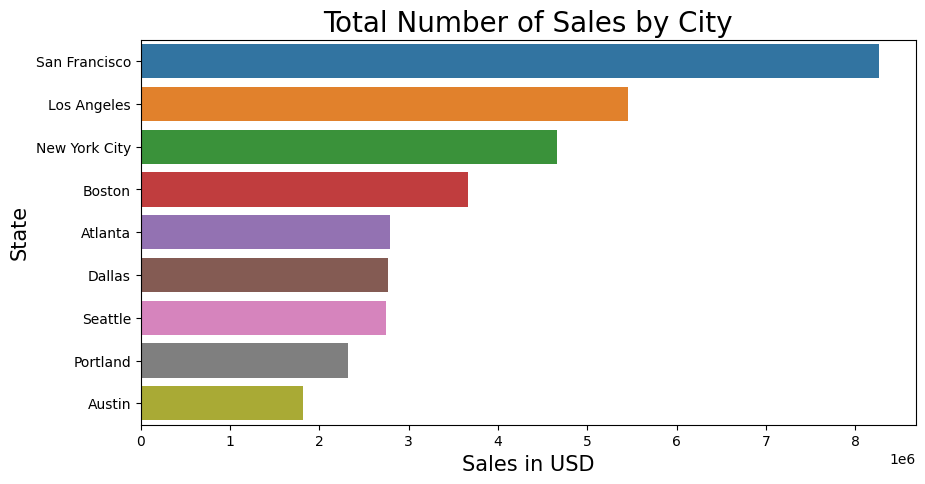

In [ ]:
plt.figure(figsize = (10,5))

sns.barplot(
    data = city_sales,
    x = city_sales['Price Transaction'],
    y = city_sales['City'],
    )

plt.title('Total Number of Sales by City',fontsize = 20)
plt.xlabel('Sales in USD',fontsize = 15)
plt.ylabel('State',fontsize = 15)

**Let's do it by month as well**

In [ ]:
city_month_sales = df.groupby(['Month Number', 'Month', 'City'])['Price Transaction'].sum().reset_index()

city_month_sales

,Month Number,Month,City,Price Transaction
0,1,January,Atlanta,149159.54
1,1,January,Austin,88087.06
2,1,January,Boston,201088.49
3,1,January,Dallas,143462.51
4,1,January,Los Angeles,288601.90
...,...,...,...,...
103,12,December,Los Angeles,684044.84
104,12,December,New York City,646770.83
105,12,December,Portland,303714.11
106,12,December,San Francisco,1106601.27


In [ ]:
city_name = df['City'].unique().tolist()

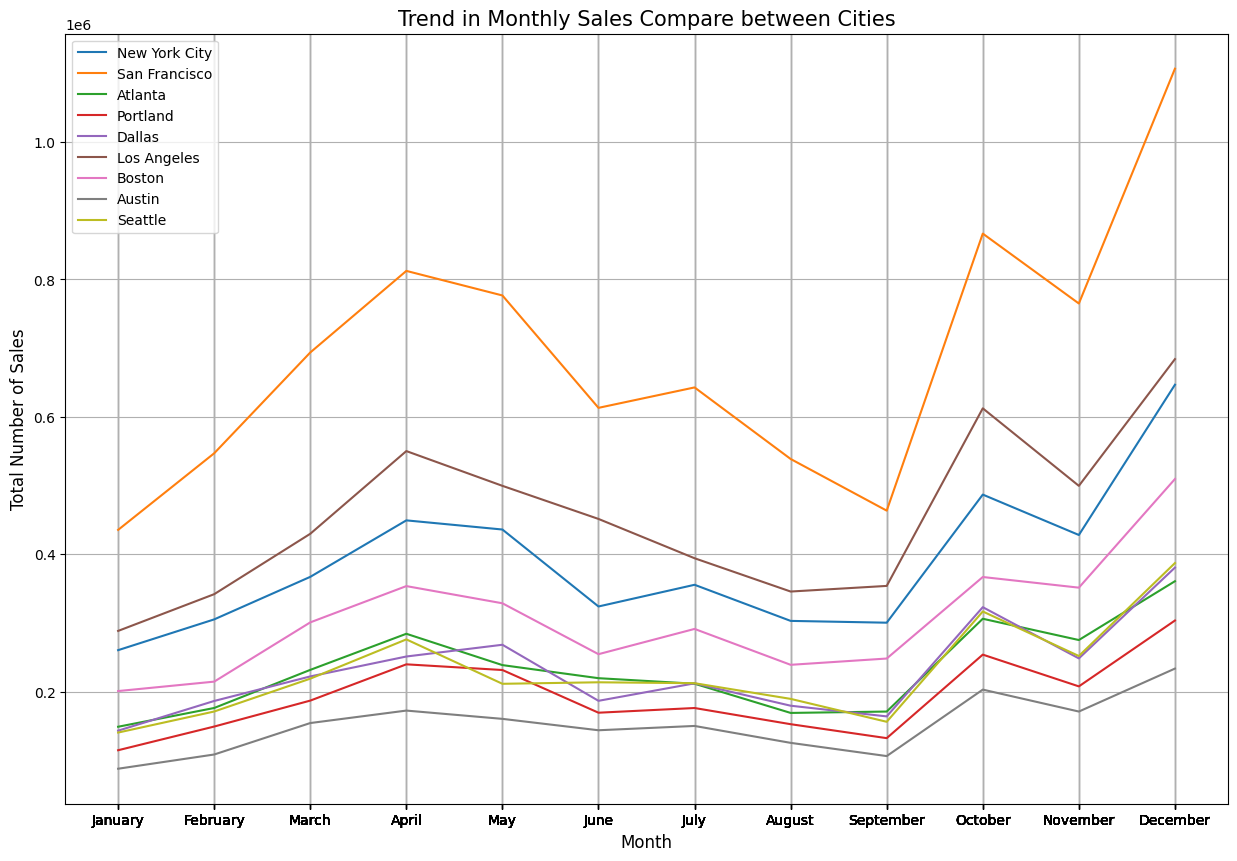

In [ ]:
plt.figure(figsize = (15,10))

for i in range(len(city_name)):
  data = city_month_sales[city_month_sales['City'] == city_name[i]]
  sns.lineplot(data = data, x = 'Month', y = 'Price Transaction', label = city_name[i])


plt.xlabel('Month',fontsize =12)
plt.ylabel('Total Number of Sales',fontsize = 12)
plt.title('Trend in Monthly Sales Compare between Cities', fontsize=15)
plt.xticks(ticks = city_month_sales['Month'])
plt.grid(True)

plt.show()

**The trend seems to be able the same in every city**

**Let's see the most popular items**

In [ ]:
product_order = df.groupby(['Product'])['Quantity Ordered'].count().sort_values(ascending = False).reset_index()

product_order

,Product,Quantity Ordered
0,USB-C Charging Cable,21903
1,Lightning Charging Cable,21658
2,AAA Batteries (4-pack),20641
3,AA Batteries (4-pack),20577
4,Wired Headphones,18882
5,Apple Airpods Headphones,15549
6,Bose SoundSport Headphones,13325
7,27in FHD Monitor,7507
8,iPhone,6842
9,27in 4K Gaming Monitor,6230


Text(0.5, 0, 'Count')

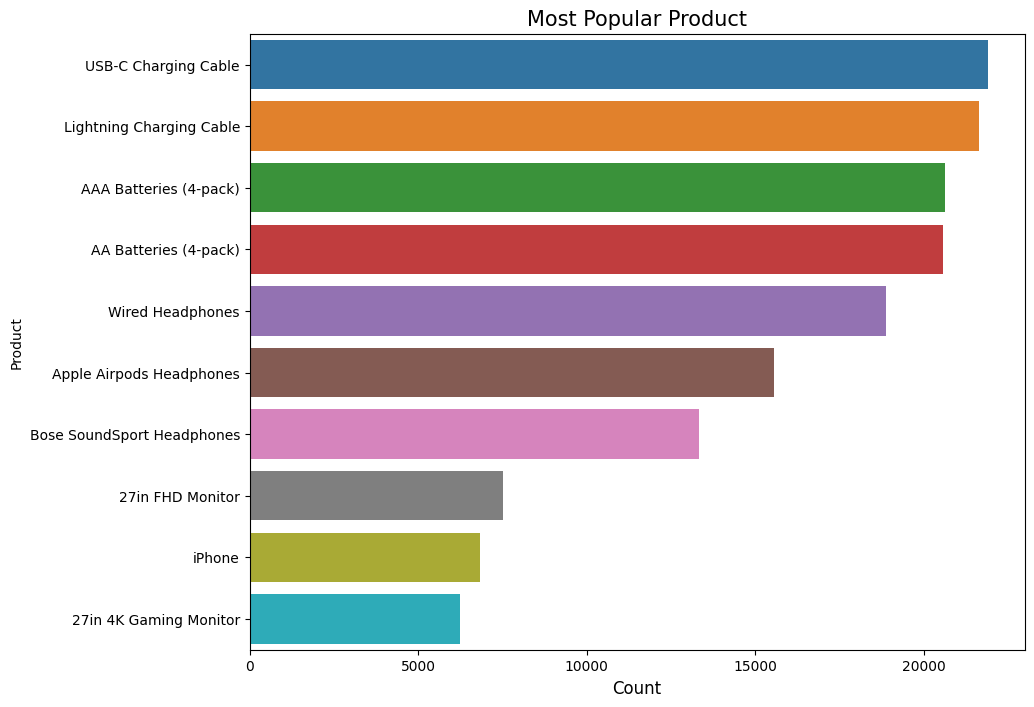

In [ ]:
plt.figure(figsize = (10,8))

sns.barplot(
    data = product_order[0:10],
    x = 'Quantity Ordered',
    y = 'Product'
)

plt.title('Most Popular Product', fontsize = 15)
plt.xlabel('Count', fontsize = 12)

**Let's see if there are products bought together**


In [ ]:
df['Sold Together'] = df.groupby(["Order ID"])['Product'].transform(lambda x: ', '. join(x))

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,State,City,Price Transaction,Month,Month Number,Sold Together
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",NY,New York City,1700.00,December,12,Macbook Pro Laptop
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",NY,New York City,600.00,December,12,LG Washing Machine
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",NY,New York City,11.95,December,12,USB-C Charging Cable
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",CA,San Francisco,149.99,December,12,27in FHD Monitor
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",GA,Atlanta,11.95,December,12,USB-C Charging Cable


In [ ]:
def groupby(x):
  if x.find(',') == -1:
    return False
  else:
    return True

In [ ]:
df['Grouped'] = df['Sold Together'].apply(groupby)

In [ ]:
temp = pd.DataFrame()

temp['Sold Together'] = df['Sold Together']
temp['Count'] = df['Sold Together']

In [ ]:
sold_together = temp[df['Grouped']].groupby('Sold Together')['Count'].count().sort_values(ascending = False).reset_index()

sold_together

,Sold Together,Count
0,"iPhone, Lightning Charging Cable",1764
1,"Google Phone, USB-C Charging Cable",1712
2,"iPhone, Wired Headphones",722
3,"Vareebadd Phone, USB-C Charging Cable",624
4,"Google Phone, Wired Headphones",606
...,...,...
361,"iPhone, 27in FHD Monitor",2
362,"LG Dryer, Lightning Charging Cable",2
363,"LG Dryer, Google Phone",2
364,"LG Dryer, Flatscreen TV",2


**Top 10 items sold together**

Text(0, 0.5, 'Products')

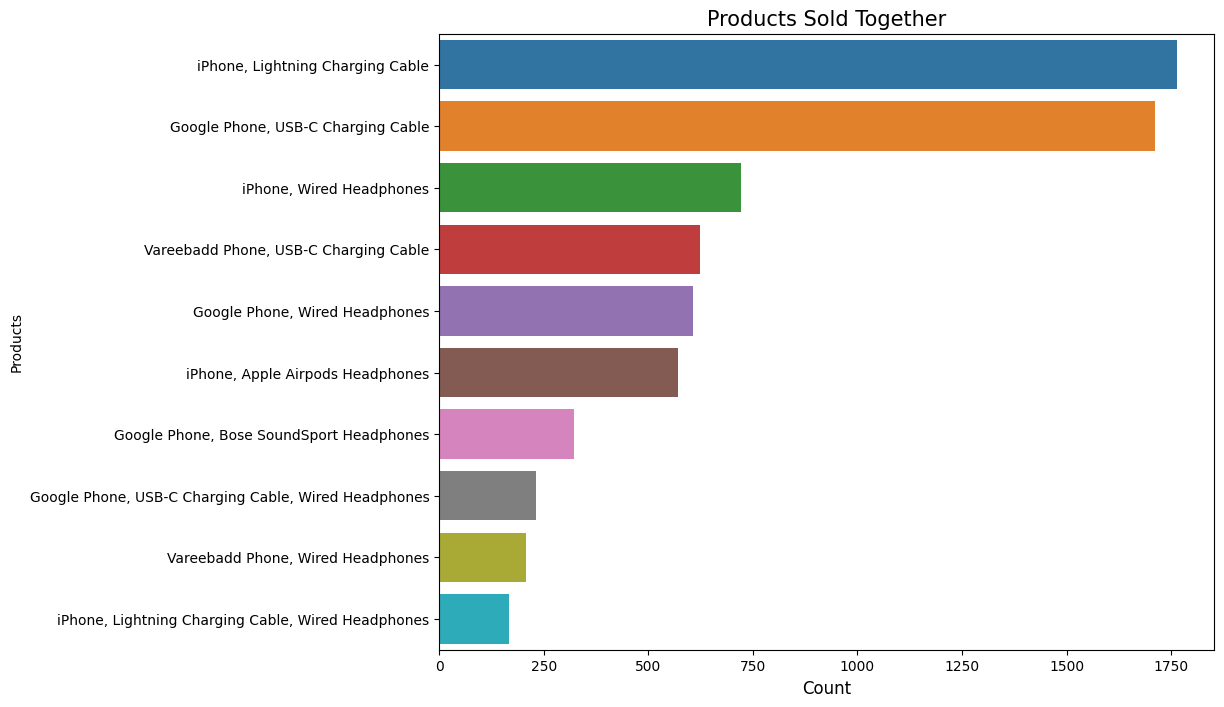

In [ ]:
plt.figure(figsize = (10,8))

sns.barplot(
    data = sold_together.iloc[0:10],
    x = 'Count',
    y = 'Sold Together'
)

plt.title('Products Sold Together', fontsize = 15)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Products')